## **Predykcja ceny samochodu na podstawie jego stanu technicznego**
W tym notatniku znajdziesz:

* opis projektu
* wymagania
* wykorzystywane biblioteki
* dobór danych
* analiza pobranych danych
* predykcja ceny samochodu

### **Opis**

<a href="https://github.com/troshchylo/predicting-car-prices" target="_blank">Ten projekt</a> ma na celu przewidzenie ceny samochodu na podstawie dostępnych cech. Wykorzystamy dane dotyczące różnych samochodów, takie jak marka, model, rok produkcji, przebieg, pojemność skokowa, rodzaj paliwa, cena. Wykorzystamy metody uczenia maszynowego, aby stworzyć model predykcyjny, który będzie w stanie oszacować cenę samochodu na podstawie tych cech.

### **Wymagania**

Wszystkie wymagania są umieszczone w pliku requirements.txt i były wygenerowane przez *pipreqs*.

Żeby pobrać *pipreqs* należy wpisać do konsoli:

`pip install pipreqs`

Importy:

In [1]:
from price_predictor import PricePredictor
from data_formatter import DataFormatter
from data_analysis import DataAnalyzer

### **Wykorzystywane biblioteki**

* **Pandas**: Biblioteka do manipulacji i analizy danych.
* **NumPy**: Biblioteka do obliczeń naukowych.
* **Scikit-learn**: Biblioteka do uczenia maszynowego.
* **Matplotlib**: Biblioteka do wizualizacji danych.
* **Scrapy**: Biblioteka do wydajnego i skalowalnego web scrapingu

### **Dobór danych**

W projekcie dane pobierałem ze strony internetowej *otomoto.pl*. 

Dane zawierają takie kryteria:
* Marka pojazdu
* Model pojazdu
* Rok produkcji
* Przebieg
* Pojemnosc skokowa
* Rodzaj paliwa
* Cena

Do skrapowania wykorzystałem bibliotekę *scrapy*.

Wszystkie pliki związane z danymi samochodów są w folderze *cars_dataset*.

Marki samochodów znalazłem na <a href="https://github.com/jedrzejd/scrap-otomoto/blob/master/car_models.txt" target="_blank">githubie</a>

Skrapowanie danych o samochodach odbywało się w 2 etapy:
1. Pobierałem modele każdej marki za pomocą skryptu *models_parser.py*
2. Pobierałem dane samochodów dla każdej marki i każdego modelu

Żeby uruchomić te skrypty musimy do konsoli wpisać te komendy:

`cd "ścieżka do projektu"`

`scrapy runspider models_parser.py`

`scrapy runspider cars_parser.py`

Na moim komputerze czas pobierania wszystkich danych wynosi około 10 minut

### **Analiza pobranych danych**

Do analizy pobranych danych wykorzystałem biblioteki: *pandas*, *matplotlib*, *numpy*

Formatowanie pobranych danych:

In [3]:
df = DataFormatter()

df.import_csv_data('cars_dataset/cars.csv')

Analiza pobranych danych:

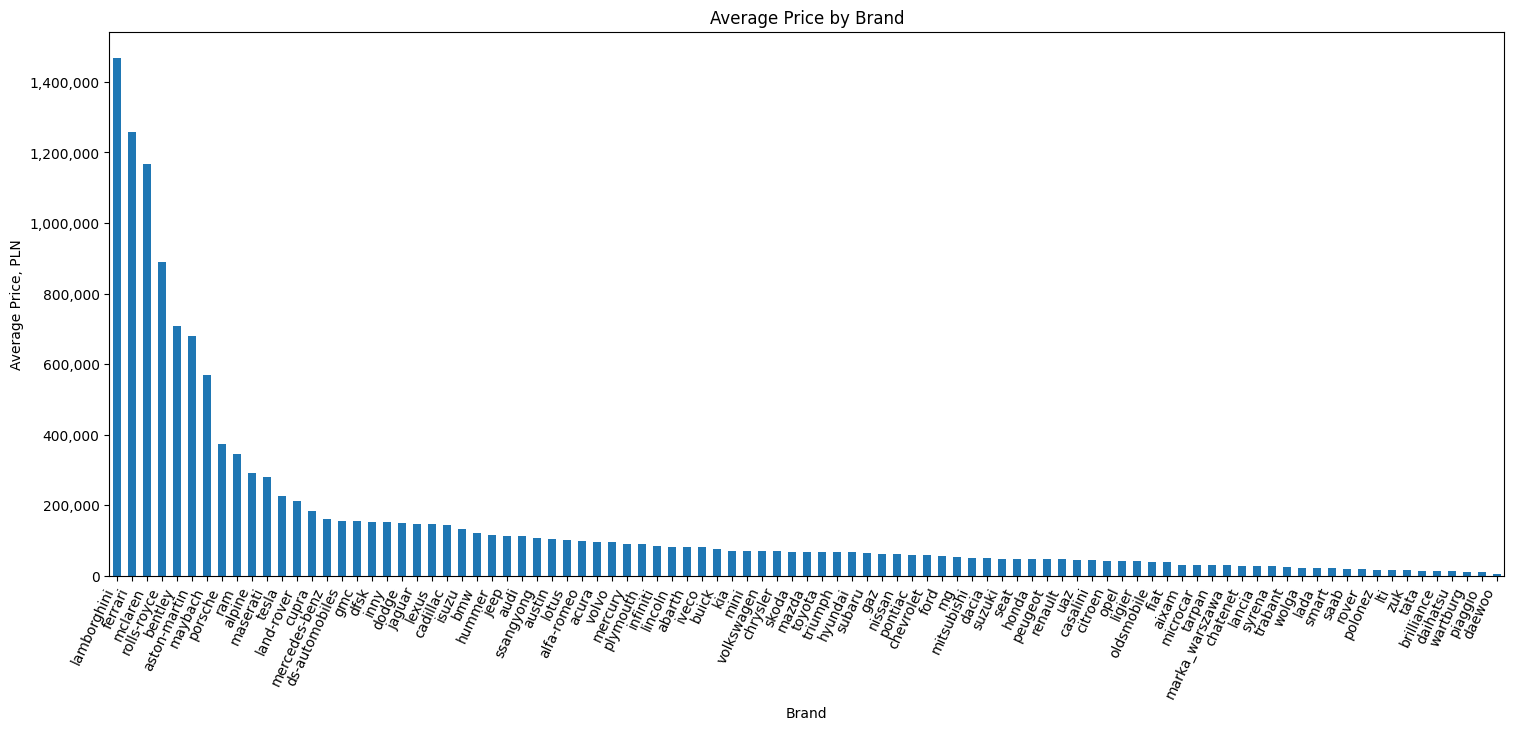

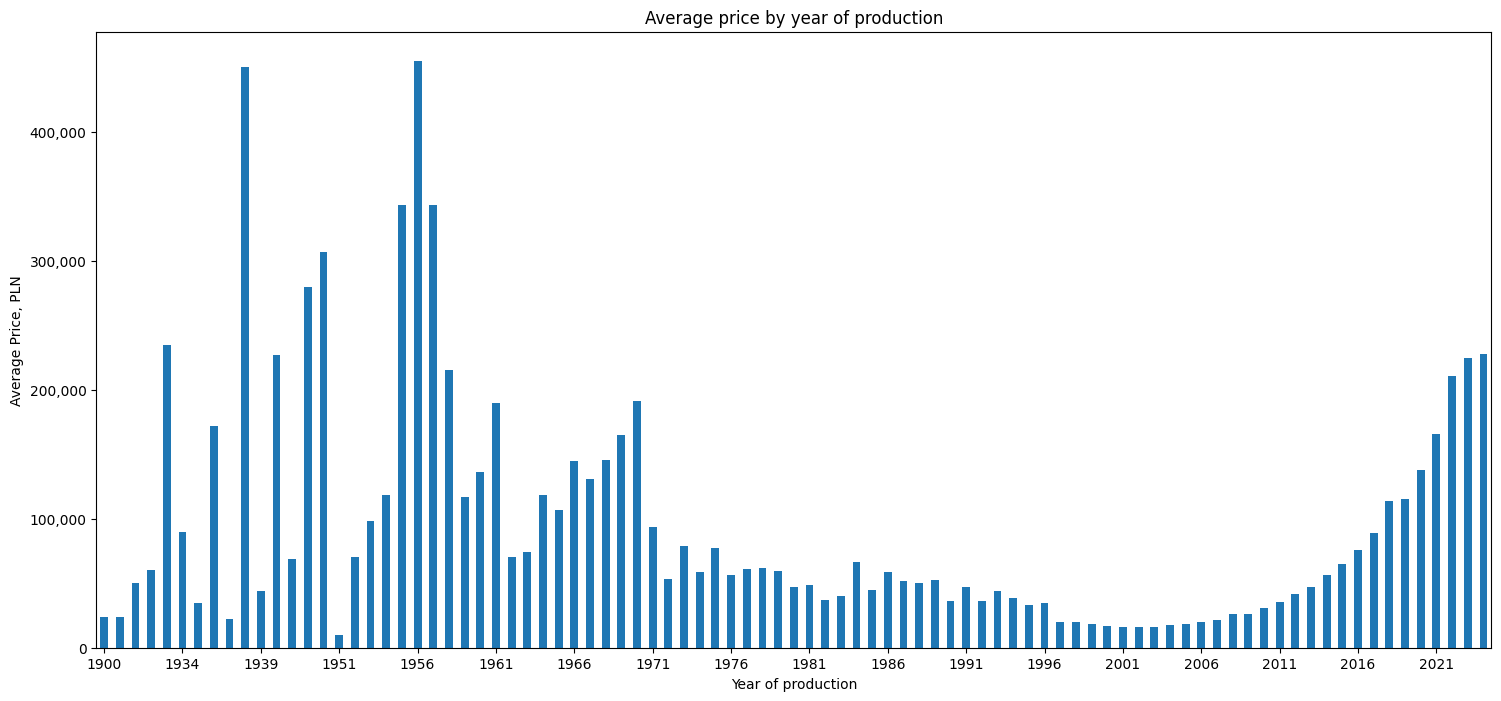

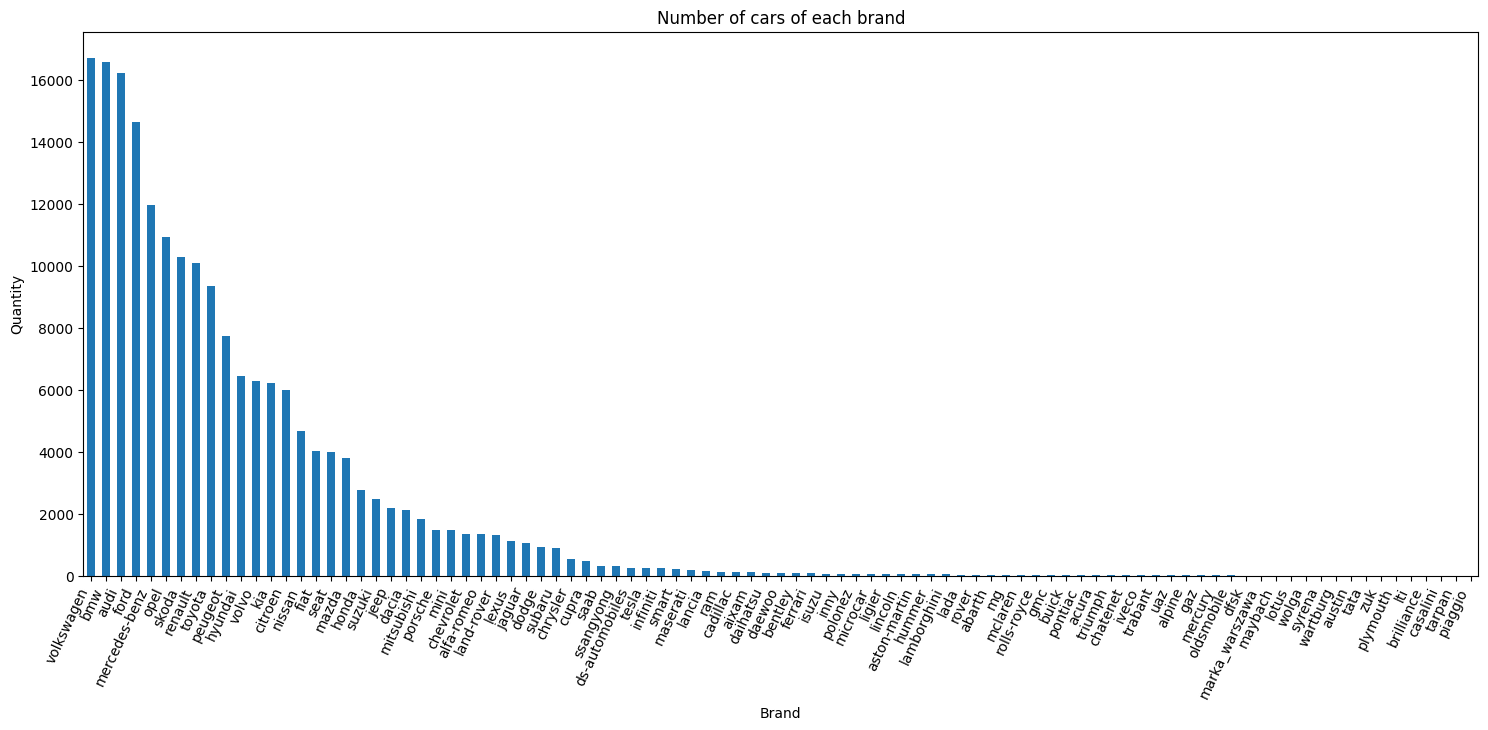

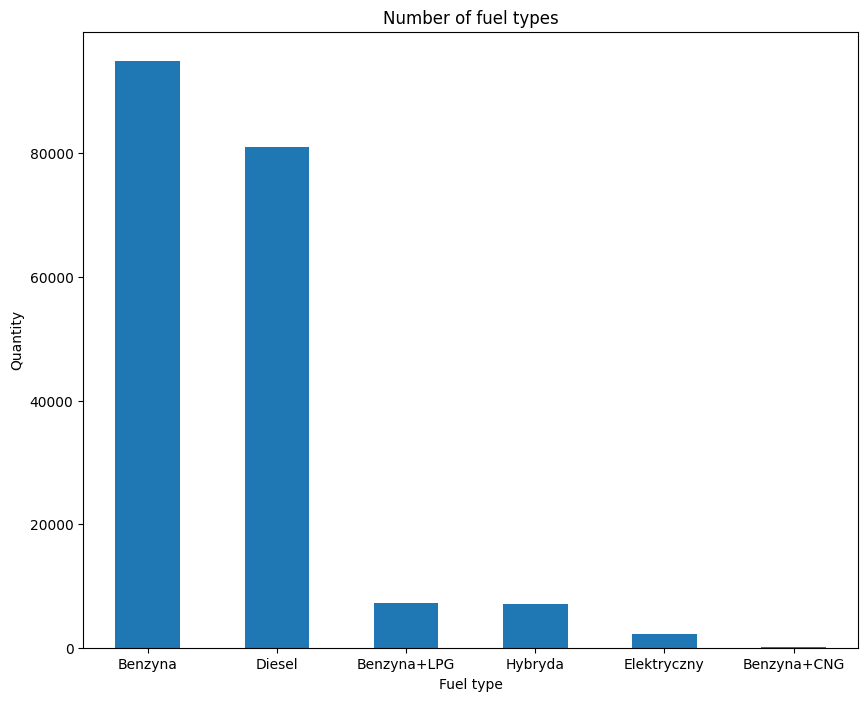

In [4]:
data_analyzer = DataAnalyzer(df)

data_analyzer.brand_prices()
data_analyzer.avg_price_by_year()
data_analyzer.brand_counts()
data_analyzer.fuel_type_counts()

### **Predykcja ceny samochodu**

Żeby przewidzieć cenę samochodu wykorystałem bibliotekę sklearn

Prykładowe wywołanie fukncji predykcji ceny:

In [5]:
pp = PricePredictor()

pp.import_cars_data_df(df)

pp.load_model('trained_models/price_predictor.pkl')

In [7]:
car_features = ('opel', 'vectra', 2000, 220000, 1598, 'Benzyna')
print(pp.predict_price(car_features)[0])

3600.0
